<font size="+3">Исследования рынка общепита в Москве для принятия решения об открытии нового заведения</font> 


Инвесторы из фонда «Shut Up and Take My Money» решили попробовать себя в новой области и открыть заведение общественного питания в Москве. Заказчики ещё не знают, что это будет за место: кафе, ресторан, пиццерия, паб или бар, — и какими будут расположение, меню и цены.

Для начала они просят вас — аналитика — подготовить исследование рынка Москвы, найти интересные особенности и презентовать полученные результаты, которые в будущем помогут в выборе подходящего инвесторам места.

Постарайтесь сделать презентацию информативной и лаконичной. Её структура и оформление сильно влияют на восприятие информации читателями вашего исследования. Выбирать инструменты (matplotlib, seaborn и другие) и типы визуализаций вы можете самостоятельно.

# Описание данных

Вам доступен датасет `moscow_places` с заведениями общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Информация, размещённая в сервисе Яндекс Бизнес, могла быть добавлена пользователями или найдена в общедоступных источниках. Она носит исключительно справочный характер.

Файл `moscow_places.csv`:

- `name` — название заведения;
- `address` — адрес заведения;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `lat` — широта географической точки, в которой находится заведение;
- `lng` — долгота географической точки, в которой находится заведение;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — `5.0`);
- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
    - «Средний счёт: 1000–1500 ₽»;
    - «Цена чашки капучино: 130–220 ₽»;
    - «Цена бокала пива: 400–600 ₽».
       и так далее;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Средний счёт»:
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число. 
    - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт. 
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Цена одной чашки капучино»:
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число. 
    - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт. 
- `chain` — число, выраженное `0` или `1`, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки);
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `seats` — количество посадочных мест.

# Загрузка и предобработка данных 

## Загрузка таблиц и библиотек

Загрузим библиотеки и откроем файл с датасетом

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
from matplotlib import pyplot
import re

import folium
from folium.plugins import MarkerCluster
import json
from folium import Choropleth 
from folium import CustomIcon

import plotly.io as pio
pio.renderers.default = "png"

from IPython.display import Image, display

In [2]:
data = pd.read_csv('C:/Users/Georgii/Desktop/ANALYTICS/moscow_places.csv')

Изучим сохраненные данные. Выведем основную информацию по таблицe

In [3]:
data.head(10)

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0
5,Sergio Pizza,пиццерия,"Москва, Ижорская улица, вл8Б",Северный административный округ,"ежедневно, 10:00–23:00",55.888010,37.509573,4.6,средние,NaN,NaN,NaN,0,NaN
6,Огни города,"бар,паб","Москва, Клязьминская улица, 9, стр. 3",Северный административный округ,пн 15:00–04:00; вт-вс 15:00–05:00,55.890752,37.524653,4.4,средние,Средний счёт:199 ₽,199.0,NaN,0,45.0
7,Mr. Уголёк,быстрое питание,"Москва, Клязьминская улица, 9, стр. 3",Северный административный округ,"пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00...",55.890636,37.524303,4.7,средние,Средний счёт:200–300 ₽,250.0,NaN,0,45.0
8,Donna Maria,ресторан,"Москва, Дмитровское шоссе, 107, корп. 4",Северный административный округ,"ежедневно, 10:00–22:00",55.880045,37.539006,4.8,средние,Средний счёт:от 500 ₽,500.0,NaN,0,79.0
9,Готика,кафе,"Москва, Ангарская улица, 39",Северный административный округ,"ежедневно, 12:00–00:00",55.879038,37.524487,4.3,средние,Средний счёт:1000–1200 ₽,1100.0,NaN,0,65.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


***Вывод: Данные выглядят корректно. Необходимо выполнить их предобработку, заполнить пропуски, проверить наличие дубликатов, добавить вспомогательные столбцы***

## Предобработка данных

### Проверка на пропуски и дубликаты

Проверим наличие дубликатов.

In [5]:
print (f'Количество строчек дубликатов: {data.duplicated().sum()}')

Количество строчек дубликатов: 0


In [6]:
data[['name','address']].duplicated().sum()

0

Очевидные дубликаты в датафрейме отсутствуют

Проверим наличие пропусков в датафрейме.

In [7]:
data.isna().sum()

name                    0
category                0
address                 0
district                0
hours                 536
lat                     0
lng                     0
rating                  0
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
chain                   0
seats                3611
dtype: int64

In [8]:
(data.isna().mean()*100).round(1)

name                  0.0
category              0.0
address               0.0
district              0.0
hours                 6.4
lat                   0.0
lng                   0.0
rating                0.0
price                60.6
avg_bill             54.6
middle_avg_bill      62.5
middle_coffee_cup    93.6
chain                 0.0
seats                43.0
dtype: float64

В данных имеется достаточно большое количество пропусков. Попробуем заменить пропуски медианными значениями в данных, которые логически связаны друг с другом. Это стоблцы с категориями цен и средними чеками, а именно: `price`, `middle_avg_bill` и `middle_coffee_cup`.

 Посчитаем какое количество пропущенных значений получится заменить в столбцах `middle_avg_bill` и `middle_coffee_cup` при известной ценовой категории заведения (`price`), предполагая, что категории цен заведения может соответствовать медианным значениям среднего чека и средней цены чашки кофе в данной категории.

In [9]:
# подсчет кол-ва строк, где в столбце price значения заполнены, а в столбцах middle_avg_bill и middle_coffee_cup - NaN
avg_bill_nan = data[(data['price'] == data['price']) 
     & (data['middle_avg_bill'] != data['middle_avg_bill'])
    ].name.count()

print (f'Количество пропущенных значений, которые можно заменить: {avg_bill_nan}')
print (f'Процент пропущенных значений от общего количества пропусков: \
{round((avg_bill_nan / data.isna().middle_avg_bill.sum())*100, 2)} %')

Количество пропущенных значений, которые можно заменить: 636
Процент пропущенных значений от общего количества пропусков: 12.1 %


Убедимся, что заполненные значения в столбце `middle_coffee_cup` относятся к кофейням. 

In [10]:
data[data['middle_coffee_cup'] == data['middle_coffee_cup']].category.value_counts()

кофейня            521
бар,паб              6
кафе                 4
пиццерия             3
быстрое питание      1
Name: category, dtype: int64

Действильно, значения в `middle_coffee_cup` соответствуют, в основном, кофейням. Посчитаем количество пропусков, которые можно заполнить, по категории "кофейня".

In [11]:
avg_coffee_nan = data[
    (data['price'] == data['price']) 
    & (data['middle_coffee_cup'] != data['middle_coffee_cup'])
].query('category == "кофейня"').name.count()

print (f'Количество пропущенных значений, которые можно заменить: {avg_coffee_nan}')
print (f'Процент пропущенных значений от общего количества пропусков: \
{round((avg_coffee_nan / data.isna().middle_coffee_cup.sum())*100, 2)} %')

Количество пропущенных значений, которые можно заменить: 207
Процент пропущенных значений от общего количества пропусков: 2.63 %


Заменяем пропущенные значения для стоблца `middle_avg_bill`

In [12]:
# список категорий цен для цикла
prices = data['price'].unique()[1:]
prices

array(['выше среднего', 'средние', 'высокие', 'низкие'], dtype=object)

In [13]:
# цикл, который считает медианные значения среднего чека для каждой категории цен
avg_bill_medians = []
for element in prices:
    var = data[data['price'] == element].middle_avg_bill.median()
    avg_bill_medians.append(var)
avg_bill_medians # список используем в функции fill_nan_bill

[1250.0, 500.0, 2000.0, 180.0]

In [14]:
# пишем функции для заполнения пропусков медианными значениями из списка avg_bill_medians
def fill_nan_bill(row):
    if row['price'] == row['price'] and row['middle_avg_bill'] != row['middle_avg_bill']:
        if row['price'] == 'выше среднего':
            return avg_bill_medians[0]
        elif row['price'] == 'средние':
            return avg_bill_medians[1]
        elif row['price'] == 'высокие':
            return avg_bill_medians[2]
        elif row['price'] == 'низкие':
            return avg_bill_medians[3]
    else:
        return row['middle_avg_bill']

In [15]:
# применяем написанную функцию к датафрейму
data['middle_avg_bill'] = data.apply(fill_nan_bill, axis=1)

Заменяем пропущенные значения для стоблца `middle_coffee_cup`

In [16]:
# цикл, который считает медианные значения средней цены чашки кофе для каждой категории цен
middle_coffee_medians = []
for element in prices:
    var = data[data['price'] == element].middle_coffee_cup.median()
    middle_coffee_medians.append(var)
middle_coffee_medians

[203.0, 200.0, 250.0, 139.0]

In [17]:
# пишем функции для заполнения пропусков медианными значениями из списка middle_coffee_medians
def fill_nan_coffee(row):
    if row['price'] == row['price'] \
    and row['middle_coffee_cup'] != row['middle_coffee_cup'] \
    and row['category'] == 'кофейня':
        if row['price'] == 'выше среднего':
            return middle_coffee_medians[0]
        elif row['price'] == 'средние':
            return middle_coffee_medians[1]
        elif row['price'] == 'высокие':
            return middle_coffee_medians[2]
        elif row['price'] == 'низкие':
            return middle_coffee_medians[3]
    else:
        return row['middle_coffee_cup']

In [18]:
# применяем написанную функцию к датафрейму
data['middle_coffee_cup'] = data.apply(fill_nan_coffee, axis=1)

Заменим пропуски для обратного случая. Когда известны значения `middle_avg_bill` и `middle_coffee_cup`, а в стоблце `price` - пропущенные значения

In [19]:
price_nan = data[(data['price'] != data['price']) 
     & (data['middle_avg_bill'] == data['middle_avg_bill'])
    ].name.count()

print (f'Количество пропущенных значений, которые можно заменить: {price_nan}')
print (f'Процент пропущенных значений от общего количества пропусков: \
{round((price_nan / data.isna().middle_avg_bill.sum())*100, 2)} %')

Количество пропущенных значений, которые можно заменить: 470
Процент пропущенных значений от общего количества пропусков: 10.17 %


In [20]:
price_coffee_nan = data[
    (data['price'] != data['price']) 
    & (data['middle_coffee_cup'] == data['middle_coffee_cup'])
].query('category == "кофейня"').name.count()

print (f'Количество пропущенных значений, которые можно заменить: {price_coffee_nan}')
print (f'Процент пропущенных значений от общего количества пропусков: \
{round((price_coffee_nan / data.isna().middle_coffee_cup.sum())*100, 2)} %')

Количество пропущенных значений, которые можно заменить: 252
Процент пропущенных значений от общего количества пропусков: 3.29 %


Необходимо наметить границы значений по среднему чеку. Для этого построим boxplot по средним чекам, исключая выбросы, а также посчитаем 10-ые и 90-ые перцентили по каждой категории. На основе полученных значений, сформируем ценовые диапазоны категорий цен.

In [21]:
sns.set_palette("Set2")

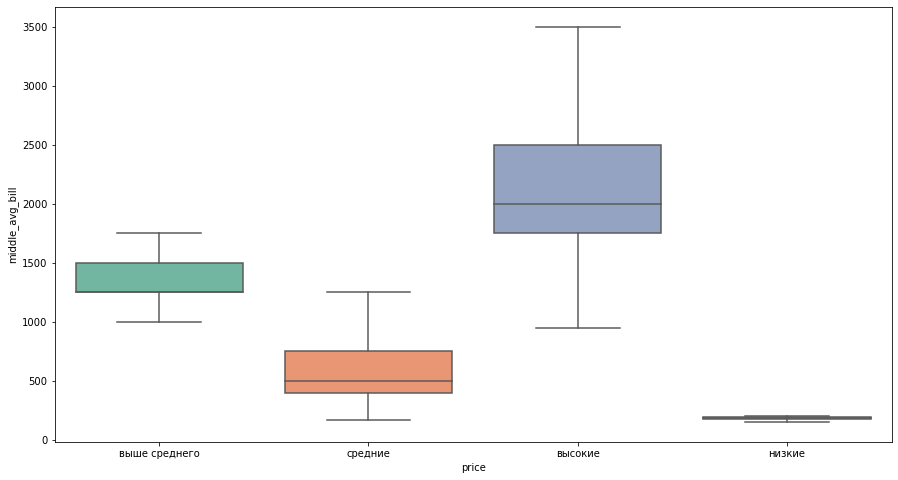

In [22]:
plt.figure(figsize=(15,8))
sns.boxplot(x='price', y='middle_avg_bill', data=data, showfliers= False);

In [23]:
# считаем перцентили для разных категорий
percentiles = [10,90]
print (prices)
for percent in percentiles:
    bill_medians = []
    for element in prices:
        var = data[data['price'] == element].middle_avg_bill
        bill_medians.append(np.percentile(var, percent))
    print (bill_medians)   

['выше среднего' 'средние' 'высокие' 'низкие']
[1200.0, 300.0, 1750.0, 137.5]
[1500.0, 1000.0, 3250.0, 300.0]


Примем следующие ценовые диапазоны средних чеков по категориям:
- низкие - до 300 рублей 
- средние - от 300 до 1100 рублей
- выше среднего - от 1100 до 1625 рублей 
- высокие - от 1625 рублей

Заменяем пропущенные значения в `price` по ценовым диапазонам в `middle_avg_bill`

In [24]:
def fill_nan_price_bill(row):
    if row['price'] != row['price'] \
    and row['middle_avg_bill'] == row['middle_avg_bill']:
        if row['middle_avg_bill'] < 300:
            return 'низкие'
        elif 300 <= row['middle_avg_bill'] < 1100:
            return 'средние'
        elif 1100 <= row['middle_avg_bill'] < 1625:
            return 'выше среднего'
        elif row['middle_avg_bill'] >= 1625:
            return 'высокие'
    else:
        return row['price']

In [25]:
data['price'] = data.apply(fill_nan_price_bill, axis=1)

Для средней цены чашки кофе используем boxplot, и по нему сформируем диапазон цен

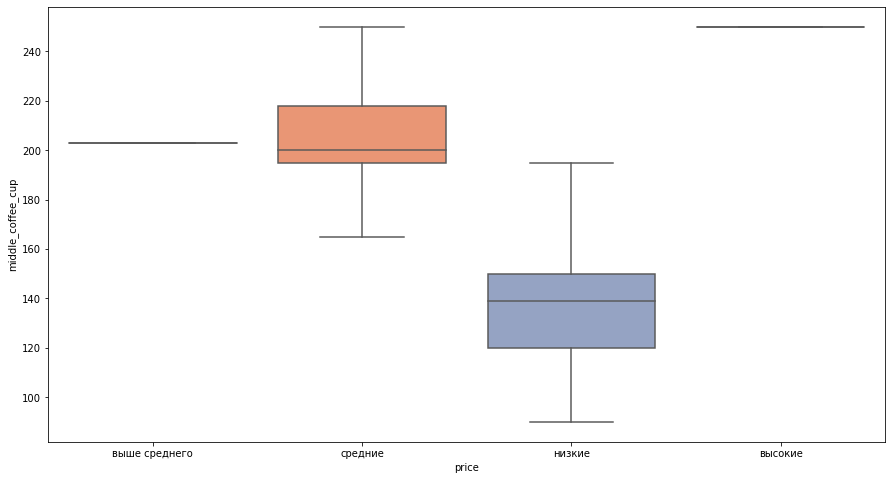

In [26]:
plt.figure(figsize=(15,8))
sns.boxplot(x='price', y='middle_coffee_cup', data=data, showfliers= False);

Примем следующий диапазон цен по средней стоимости кофе по категориям:
- низкие - до 150 рублей 
- средние - от 150 до 200 рублей
- выше среднего - от 200 до 250 рублей 
- высокие - от 250 рублей

Заменяем пропущенные значения в `price` по ценовым диапазонам в `middle_coffee_cup`

In [27]:
def fill_nan_price_coffee(row):
    if row['price'] != row['price'] \
    and row['middle_coffee_cup'] == row['middle_coffee_cup']:
        if row['middle_coffee_cup'] < 150:
            return 'низкие'
        elif 150 <= row['middle_coffee_cup'] < 200:
            return 'средние'
        elif 200 <= row['middle_coffee_cup'] < 250:
            return 'выше среднего'
        elif row['middle_coffee_cup'] >= 250:
            return 'высокие'
    else:
        return row['price']

In [28]:
data['price'] = data.apply(fill_nan_price_coffee, axis=1)

Обновим известное количество пропусков в датафрейме

In [29]:
data.isna().sum()

name                    0
category                0
address                 0
district                0
hours                 536
lat                     0
lng                     0
rating                  0
price                4364
avg_bill             4590
middle_avg_bill      4621
middle_coffee_cup    7664
chain                   0
seats                3611
dtype: int64

In [30]:
(data.isna().mean()*100).round(1)

name                  0.0
category              0.0
address               0.0
district              0.0
hours                 6.4
lat                   0.0
lng                   0.0
rating                0.0
price                51.9
avg_bill             54.6
middle_avg_bill      55.0
middle_coffee_cup    91.2
chain                 0.0
seats                43.0
dtype: float64

*Суммарно удалось заменить 1565 пропусков*

### Дополнение таблицы

Добавим отдельный столбец `street` с названиями улиц из столбца с адресом

In [31]:
# функция для отбора названия улицы из строки с адресом, принимая километры на МКАД за отдельные улицы
def street_row(row):
    name = row['address'].split(', ')
    if name[1] == 'МКАД':
        return str('МКАД, ' + name[2])
    else:
        return name[1]

In [32]:
data['street'] = data.apply(street_row, axis=1)

Создадим столбец `is_24/7` с обозначением, что заведение работает ежедневно и круглосуточно (24/7)

In [33]:
data['is_24/7'] = data['hours'].str.contains('круглосуточно')

In [34]:
data.tail(10)

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24/7
8396,Пекинский Двор,ресторан,"Москва, Ленинский проспект, 158",Западный административный округ,"ежедневно, 11:00–23:00",55.651706,37.482667,4.3,выше среднего,Средний счёт:1000–1500 ₽,1250.0,NaN,0,200.0,Ленинский проспект,False
8397,Траектория Крафт-Кафе,пиццерия,"Москва, улица Лобачевского, 52, корп. 1",Западный административный округ,"пн-пт 10:00–23:00; сб,вс 12:00–23:00",55.672011,37.492628,4.4,средние,NaN,500.0,NaN,0,60.0,улица Лобачевского,False
8398,На Волгина,кафе,"Москва, улица Академика Волгина, 2А",Юго-Западный административный округ,"ежедневно, 09:00–23:00",55.654933,37.521421,4.4,NaN,NaN,NaN,NaN,0,49.0,улица Академика Волгина,False
8399,"Пекарня, кафе-гриль",булочная,"Москва, Болотниковская улица, 52, корп. 2",Юго-Западный административный округ,"ежедневно, круглосуточно",55.662866,37.582572,4.2,низкие,Средний счёт:50–250 ₽,150.0,NaN,0,50.0,Болотниковская улица,True
8400,Практика Кофе,кофейня,"Москва, Чонгарский бульвар, 26А, корп. 1",Юго-Западный административный округ,"пн-пт 08:00–22:00; сб,вс 09:00–22:00",55.654289,37.600722,4.4,NaN,NaN,NaN,NaN,0,55.0,Чонгарский бульвар,False
8401,Суши Мания,кафе,"Москва, Профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",55.670021,37.552480,4.4,NaN,NaN,NaN,NaN,0,86.0,Профсоюзная улица,False
8402,Миславнес,кафе,"Москва, Пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",55.640875,37.656553,4.8,NaN,NaN,NaN,NaN,0,150.0,Пролетарский проспект,False
8403,Самовар,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",55.648859,37.743219,3.9,низкие,Средний счёт:от 150 ₽,150.0,NaN,0,150.0,Люблинская улица,True
8404,Чайхана Sabr,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",55.648849,37.743222,4.2,NaN,NaN,NaN,NaN,1,150.0,Люблинская улица,True
8405,Kebab Time,кафе,"Москва, Россошанский проезд, 6",Южный административный округ,"ежедневно, круглосуточно",55.598229,37.604702,3.9,NaN,NaN,NaN,NaN,0,12.0,Россошанский проезд,True


Проведем поиск неявных дубликатов заведений. Для этого, в столбце `names`, приведем к единому регистру, заменим служебные знаки, удалим лишние пробелы и заменим буквы `ё`

In [35]:
data['name'] = data.apply(lambda row: row['name'].lower(), axis=1)
data['name'] = data.apply(lambda row: row['name'].replace('ё', 'е'), axis=1)
data['name'] = data.apply(lambda row: row['name'].replace('  ', ' '), axis=1)
data['name'] = data.apply(lambda row: row['name'].replace('-', ' '), axis=1)
data['name'] = data.apply(lambda row: row['name'].replace('.', ''), axis=1)
data['name'] = data.apply(lambda row: row['name'].replace('№', ' '), axis=1)
data['name'] = data.apply(lambda row: row['name'].replace('\"', ' '), axis=1)
data['name'] = data.apply(lambda row: row['name'].strip(), axis=1)

In [36]:
data[data[['name','address']].duplicated()]

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24/7
1511,more poke,ресторан,"Москва, Волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",55.806307,37.497566,4.2,NaN,NaN,NaN,NaN,1,188.0,Волоколамское шоссе,False
2420,раковарня клешни и хвосты,"бар,паб","Москва, проспект Мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",55.810677,37.638379,4.4,NaN,NaN,NaN,NaN,1,150.0,проспект Мира,False
3109,хлеб да выпечка,кафе,"Москва, Ярцевская улица, 19",Западный административный округ,NaN,55.738449,37.410937,4.1,NaN,NaN,NaN,NaN,0,276.0,Ярцевская улица,NaN


Обнаружено 3 дубликата. Уберем их из датасета.

In [37]:
data = data.drop_duplicates(subset=['name','address']).reset_index(drop=True)

Рассмотрим также присутствие выбросов и аномалий в столбцах `seats`, `middle_avg_bill` и `middle_coffee_cup`

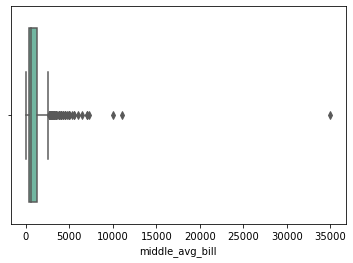

In [38]:
sns.boxplot(x=data['middle_avg_bill']);

In [39]:
data.query('middle_avg_bill > 5000').sort_values(by='middle_avg_bill')

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24/7
3036,беллини,ресторан,"Москва, Рублёвское шоссе, 28",Западный административный округ,"ежедневно, 12:00–00:00",55.747632,37.425631,4.3,высокие,Средний счёт:5000–5500 ₽,5250.0,NaN,0,150.0,Рублёвское шоссе,False
2793,крошка картошка,быстрое питание,"Москва, Щёлковское шоссе, вл75",Восточный административный округ,"ежедневно, 10:00–22:00",55.811160,37.799823,4.0,высокие,Средний счёт:1000–10000 ₽,5500.0,NaN,1,NaN,Щёлковское шоссе,False
3600,lucky izakaya bar,"бар,паб","Москва, Калашный переулок, 9",Центральный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–02:00; вс 12:00...",55.757313,37.599581,4.8,высокие,Средний счёт:5500 ₽,5500.0,NaN,0,NaN,Калашный переулок,False
3907,кантинетта антинори,ресторан,"Москва, Денежный переулок, 20",Центральный административный округ,"ежедневно, 12:00–00:00",55.745383,37.586595,4.7,высокие,Средний счёт:6000 ₽,6000.0,NaN,0,80.0,Денежный переулок,False
3515,чайка,ресторан,"Москва, Краснопресненская набережная, 12А",Центральный административный округ,"ежедневно, 12:00–00:00",55.752857,37.556365,4.8,высокие,Средний счёт:5000–8000 ₽,6500.0,NaN,1,250.0,Краснопресненская набережная,False
3393,марио,ресторан,"Москва, улица Климашкина, 17",Центральный административный округ,"ежедневно, 12:00–00:00",55.767792,37.568453,4.5,высокие,Средний счёт:7000 ₽,7000.0,NaN,0,100.0,улица Климашкина,False
3484,800°с contemporary steak,ресторан,"Москва, Большой Патриарший переулок, 6, стр. 1",Центральный административный округ,"ежедневно, 09:00–23:30",55.762708,37.592138,4.7,высокие,Средний счёт:6000–8000 ₽,7000.0,NaN,0,75.0,Большой Патриарший переулок,False
3879,white rabbit,ресторан,"Москва, Смоленская площадь, 3",Центральный административный округ,"ежедневно, 12:00–00:00",55.747608,37.581248,4.9,высокие,Средний счёт:7000–7500 ₽,7250.0,NaN,0,150.0,Смоленская площадь,False
5478,гости,ресторан,"Москва, шоссе Энтузиастов, 52",Восточный административный округ,"пн,вс 18:00–22:30",55.759088,37.760570,4.1,высокие,Средний счёт:5000–15000 ₽,10000.0,NaN,0,NaN,шоссе Энтузиастов,False
730,чойхона,"бар,паб","Москва, Дмитровское шоссе, 95А",Северный административный округ,"ежедневно, 10:00–23:00",55.871497,37.543555,4.4,высокие,Средний счёт:5000–17000 ₽,11000.0,NaN,0,49.0,Дмитровское шоссе,False


Похожими на выбросы можно назвать два последние строчки. Уберем их из датафрейма. А также, разделим на порядок заведения со средним ценником выше 4000 рублей в категории быстрое питание, предполагая наличие такой ошибки в данных

In [40]:
def bill_out_range(row):
    if row['middle_avg_bill'] > 4000 \
    and row['category'] == 'быстрое питание':
        return row['middle_avg_bill'] / 10
    else: 
        return row['middle_avg_bill']

In [41]:
data['middle_avg_bill'] = data.apply(bill_out_range, axis=1)

In [42]:
data = data.query('middle_avg_bill < 8000 or middle_avg_bill != middle_avg_bill')

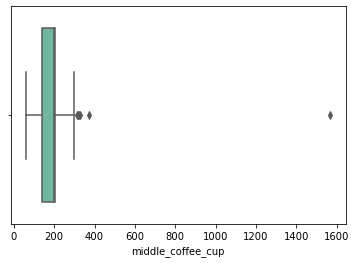

In [43]:
sns.boxplot(x=data['middle_coffee_cup']);

Для данных по средней стоимости кофе достаточно отфильтровать слишком очевидный выброс

In [44]:
data = data.query('middle_coffee_cup < 400 or middle_coffee_cup != middle_coffee_cup').reset_index(drop=True)

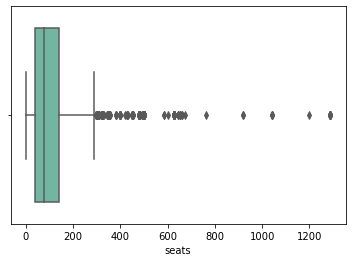

In [45]:
sns.boxplot(x=data['seats']);

In [46]:
data.query('seats > 600').sort_values(by='seats')

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24/7
1325,нам,"бар,паб","Москва, Ленинградский проспект, 69, стр. 1",Северный административный округ,"ежедневно, 11:00–21:00",55.803236,37.517898,4.2,NaN,NaN,NaN,NaN,1,625.0,Ленинградский проспект,False
2102,ванильное небо,кофейня,"Москва, Ленинградский проспект, 31А, стр. 1",Северный административный округ,пн-пт 08:00–20:00; сб 09:00–18:00,55.784066,37.559398,3.7,средние,Средний счёт:400 ₽,400.0,200.0,1,625.0,Ленинградский проспект,False
2085,лобби бар манжо,"бар,паб","Москва, Ленинградский проспект, 31А, стр. 1",Северный административный округ,пн-пт 08:30–20:00,55.783622,37.559943,4.0,средние,Средний счёт:500 ₽,500.0,NaN,0,625.0,Ленинградский проспект,False
2033,столичный вкус,столовая,"Москва, Ленинградский проспект, 35, стр. 1",Северный административный округ,пн-пт 09:00–17:00,55.789750,37.552723,4.1,NaN,NaN,NaN,NaN,1,625.0,Ленинградский проспект,False
2008,coffeeteabar,кофейня,"Москва, Ленинградский проспект, 60, корп. 1",Северный административный округ,пн-пт 07:30–20:30; сб 07:30–19:30; вс 08:30–19:30,55.799751,37.535100,4.4,низкие,Цена чашки капучино:150–210 ₽,180.0,180.0,0,625.0,Ленинградский проспект,False
1878,чайхона айва,кафе,"Москва, Ленинградский проспект, 45, корп. 1",Северный административный округ,"ежедневно, круглосуточно",55.798882,37.533990,4.3,NaN,NaN,NaN,NaN,1,625.0,Ленинградский проспект,True
1865,vasilchukí chaihona 1,ресторан,"Москва, Ленинградский проспект, 31А, стр. 1",Северный административный округ,"пн-чт 11:00–00:00; пт,сб 11:00–01:00; вс 11:00...",55.783590,37.560170,4.3,выше среднего,Средний счёт:от 1500 ₽,1500.0,NaN,1,625.0,Ленинградский проспект,False
1836,take and wake,кофейня,"Москва, Ленинградский проспект, 31А, стр. 1",Северный административный округ,"пн-пт 08:00–20:00; сб,вс 09:00–19:00",55.783494,37.559933,4.5,средние,Цена чашки капучино:120–190 ₽,NaN,155.0,1,625.0,Ленинградский проспект,False
1764,золотая бухара,ресторан,"Москва, Ленинградский проспект, 48, подъезд 1",Северный административный округ,"ежедневно, 12:00–23:00",55.796294,37.542917,4.4,NaN,NaN,NaN,NaN,0,625.0,Ленинградский проспект,False
1670,ача чача,ресторан,"Москва, Ленинградский проспект, 9Б, стр. 1",Северный административный округ,"ежедневно, 12:00–00:00",55.780576,37.574727,4.6,высокие,Средний счёт:1500–2000 ₽,1750.0,NaN,1,625.0,Ленинградский проспект,False


Для большинства заведений рассадка посетителей, в количестве большем чем 600 человек, выглядят нереалистично. Отфильтруем датасет до этого значения.

In [47]:
data = data.query('seats < 600 or seats!=seats').reset_index(drop=True)

***Вывод: Предобработка проведена. Заполнено 1565 пропусков в столбцах `price`, `middle_avg_bill` и `middle_coffee_cup`. Добавлены столбцы с отдельным названием улиц и обозначением круглосуточной работы заведения. Проведена предобработка по названиям заведений. Устранены аномальные значения из датасета.***

# Анализ данных

Оценим какие категории заведений представлены в Датафрейме. Исследуем количество объектов общественного питания по категориям.

In [48]:
sns.set_palette("Set2")

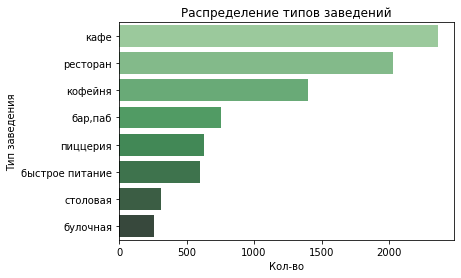

In [49]:
plt.title('Распределение типов заведений')
sns.barplot(
    data.groupby('category').name.count().reset_index().sort_values(by='name',ascending=False),
    x = 'name',
    y= 'category',
    palette="Greens_d")
plt.xlabel('Кол-во')
plt.ylabel('Тип заведения');

*В Москве преобладают заведения типа кафе, ресторан или кофейня. В целом можно, сказать, что такие категории заведений в среднем почти всегда популярнее остальных. Наименее часто люди в Москве посещают булочные и столовые.*

Изучим среднюю посадку мест в разных типах заведений

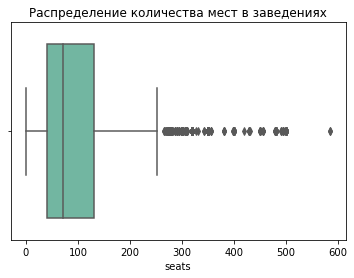

In [50]:
plt.title('Распределение количества мест в заведениях')
sns.boxplot(x=data['seats']);

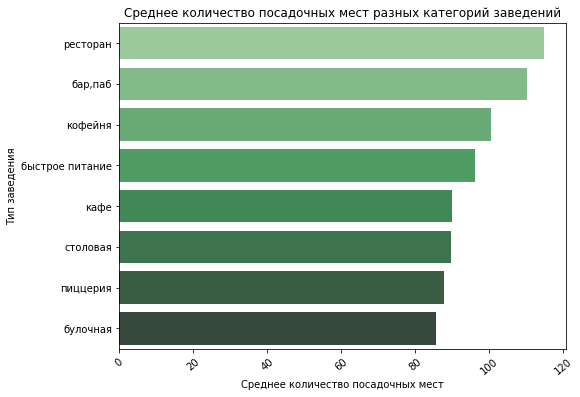

In [51]:
plt.figure(figsize=(8,6))
sns.barplot(data=data.groupby('category').seats.mean().reset_index().sort_values(by='seats',ascending=False),
    y='category', 
    x='seats', 
    palette="Greens_d") 
plt.xticks(rotation=40)
plt.title('Среднее количество посадочных мест разных категорий заведений')
plt.xlabel('Среднее количество посадочных мест')
plt.ylabel('Тип заведения');

*Предсказуемо, что большее среднее количество посадочных мест у ресторанов и баров. Меньше всего посадочных мест в среднем у булочных, пиццерий и кафе. Интересно наблюдать то, что довольно большое количество мест присутствует в кофейнях. Можно предположить, что дело может быть в большем сетевом развитии кофеен.*

Опишем принадлежность заведения к сети. Посмотрим каких заведений больше и по каким категориям.

In [52]:
print (f'Количество сетевых заведений: {data[data["chain"] == 1].name.count()}')
print (f'Количество несетевых заведений: {data[data["chain"] == 0].name.count()}')
print (f'Количества несетевых заведений в {round(data[data["chain"] == 0].name.count() / data[data["chain"] == 1].name.count(), 2)} раз больше')

Количество сетевых заведений: 3176
Количество несетевых заведений: 5169
Количества несетевых заведений в 1.63 раз больше


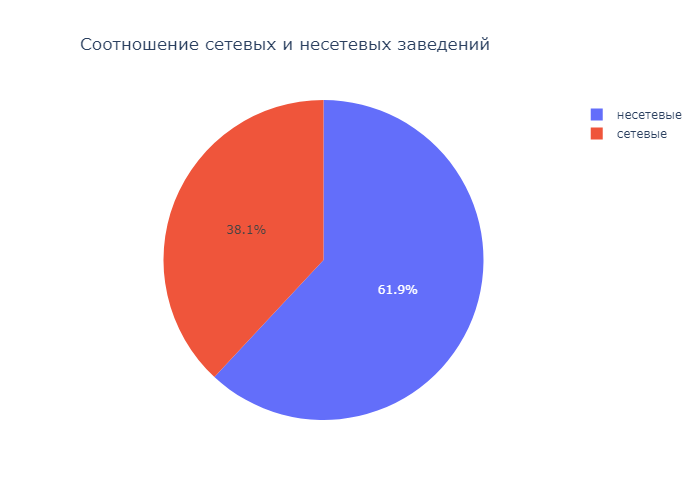

In [53]:
labels_krug = ['несетевые', 'сетевые']
values_krug = [data[data["chain"] == 0].name.count(), data[data["chain"] == 1].name.count()]
fig = go.Figure(data=[go.Pie(labels=labels_krug, values=values_krug)])
fig.update_layout(
    title=go.layout.Title(
        text="Соотношение сетевых и несетевых заведений",xref="paper",x=0)
)
fig.show() 

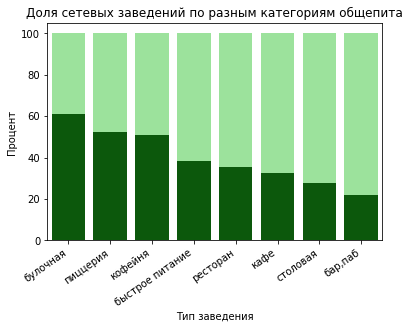

In [54]:
chain_data = data[['category', 'chain']].groupby('category').agg({'chain':['sum', 'count']}).reset_index()
chain_data.columns = ['category', 'chain', 'full']
chain_data['percent'] = (chain_data['chain'] / chain_data['full'] *100).round(2)
chain_data['%full'] = 100
chain_data = chain_data.sort_values(by='percent',ascending=False)

plt.title('Доля сетевых заведений по разным категориям общепита')
ax = sns.barplot(x='category', y='%full', data=chain_data, color='lightgreen')
ax = sns.barplot(x='category', y='percent', data=chain_data, color='darkgreen')
ax.set_xticklabels(ax.get_xticklabels(), ha='right', rotation=35)
plt.xlabel('Тип заведения')
plt.ylabel('Процент');

*Большая доля сетевых заведений распределяется среди таких заведений, как булочные, пиццерии и кофейни. Реже всего встречаются сетевые бары и столовые.*

Найдем 15 самых популярных сетевых заведений Москвы

In [55]:
data.query('chain == 1').name.value_counts().head(15)

шоколадница                            117
домино'с пицца                          76
додо пицца                              74
one price coffee                        70
яндекс лавка                            68
cofix                                   65
prime                                   50
хинкальная                              44
кофепорт                                42
кулинарная лавка братьев караваевых     38
теремок                                 38
чайхана                                 37
cofefest                                32
буханка                                 32
му му                                   27
Name: name, dtype: int64

Заведения с названием Яндекс Лавка в этом датасете явно лишние. При составлении таблицы они вероятно были ошибочно выгружены вместе с заведениями общепита, хотя по сути это служебные помещения, осуществляющие доставку, без возможности их посещения. Уберем Яндекс Лавку из датасета, чтобы не искажать результаты исследования.

In [56]:
data = data.query('name != "Яндекс Лавка"')
data.query('chain == 1').name.value_counts().head(15)

шоколадница                            117
домино'с пицца                          76
додо пицца                              74
one price coffee                        70
яндекс лавка                            68
cofix                                   65
prime                                   50
хинкальная                              44
кофепорт                                42
кулинарная лавка братьев караваевых     38
теремок                                 38
чайхана                                 37
cofefest                                32
буханка                                 32
му му                                   27
Name: name, dtype: int64

In [57]:
top_15 = data.query('chain == 1').name.value_counts().head(15).index.values.tolist()
data_top_15 = data.query('name in @top_15')
print (f'Общее количество сетевых заведений в топ-15 по популярности: {data_top_15.name.count()}')

Общее количество сетевых заведений в топ-15 по популярности: 812


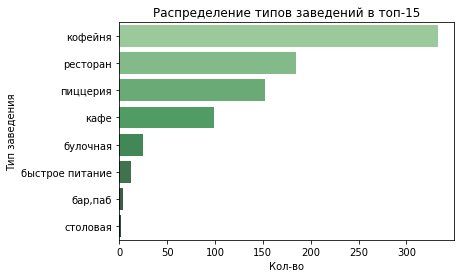

In [58]:
plt.title('Распределение типов заведений в топ-15')
sns.barplot(
    data_top_15.groupby('category').name.count().reset_index().sort_values(by='name',ascending=False),
    x = 'name',
    y= 'category',
    palette="Greens_d")
plt.xlabel('Кол-во')
plt.ylabel('Тип заведения');

*Большую часть сетевых заведений в топ-15 по популярности в Москве занимают кофейни. Остальные категории присутствуют в датасете в относительно равном количестве, за исключением сети булочных "Буханка". Наличие категорий быстрое питание, столовая и бар ошибочно представлены в графике распределения категорий заведений в топ-15, по причине того, что обычные пользователи могут вносить правки в описании заведений в Яндекс картах.*

Не лишним будет отобразить количество заведений каждой категории по районам

In [59]:
data_top_15['district'] = data_top_15.apply(
    lambda row: (''.join(re.findall(r'\b[а-яА-Я]', row["district"]))).upper(), 
    axis=1)

C:\Users\Georgii\AppData\Local\Temp/ipykernel_6008/1992735945.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



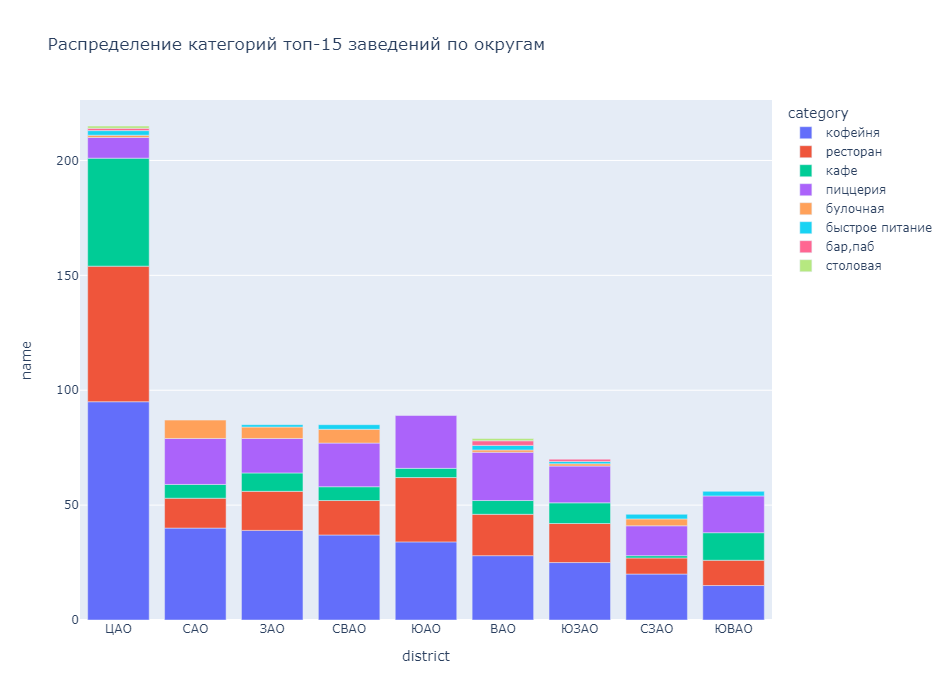

In [60]:
pop = data_top_15.groupby(['district', 'category']).agg({'name':'count'}).sort_values(by='name', ascending=False)
px.bar(pop.reset_index(), 
             x="district",
             y="name",
             color="category", 
             title = "Распределение категорий топ-15 заведений по округам",
             width=950, 
             height=700)

*Всех категорий заведений больше в административном округе, за исключением пиццерий. Отмечается также большее количество в Южном административном округе по сравнению с остальными. На севере города больше кофеен и булочных, а на юге кажется, что в среднем чуть больше кафе*

Проверим круглосуточность

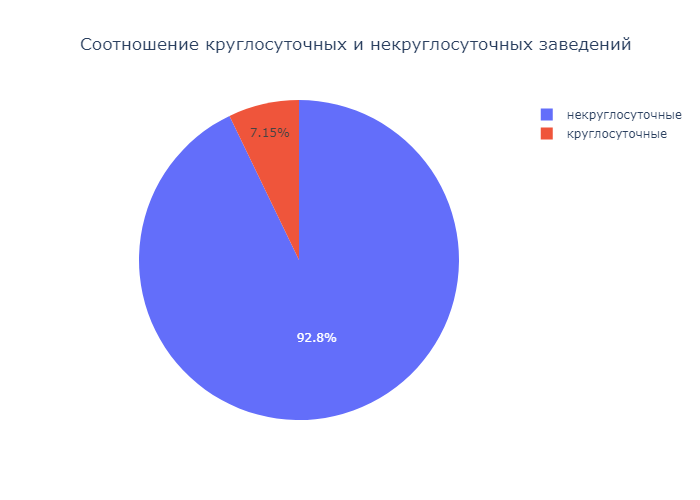

In [61]:
labels_krug = ['круглосуточные', 'некруглосуточные']
values_krug = [data_top_15[data_top_15["is_24/7"] == True].name.count(), 
               data_top_15[data_top_15["is_24/7"] == False].name.count()]
fig = go.Figure(data=[go.Pie(labels=labels_krug, values=values_krug)])
fig.update_layout(
    title=go.layout.Title(
        text="Соотношение круглосуточных и некруглосуточных заведений",xref="paper",x=0)
)
fig.show() 

Также посмотрим, как распределяются рейтинги топ-15 заведений Москвы относительно остальных сетей

In [62]:
# создадим 2 датафрейма относительного распределения рейтингом, во всех сетевых заведениях, и отдельно в заведениях топ-15
rating_data = data[data['chain'] == 1].groupby('rating', as_index=False).name.count()
rating_data['name'] = (rating_data['name'] / rating_data['name'].sum())*100

rating_data_15 = data_top_15.groupby('rating', as_index=False).name.count()
rating_data_15['name'] = (rating_data_15['name'] / rating_data_15['name'].sum())*100

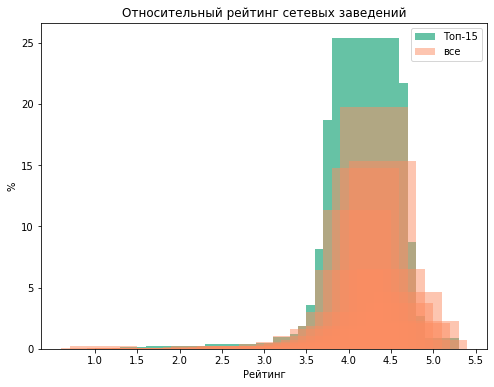

In [63]:
plt.figure(figsize=(8,6))
plt.title('Относительный рейтинг сетевых заведений')
plt.xlabel('Рейтинг')
plt.ylabel('%')
plt.xticks(np.arange(min(rating_data['rating']), max(rating_data['rating'])+1, .5))
pyplot.bar(height=rating_data_15['name'], x=rating_data_15['rating'], alpha=1, label='Топ-15')
pyplot.bar(height=rating_data['name'], x=rating_data['rating'], alpha=0.5, label='все')
plt.legend(loc='upper right');
pyplot.show()

*В среднем видно, что у самых популярных сетевых заведениях оценки посетителей соответсвенно выше, чем у всех вместе. Однако самые высокие оценки чаще получают заведения не из топ-15.*

Оценим, как вообще категории заведений влияют на рейтинги посетителей.

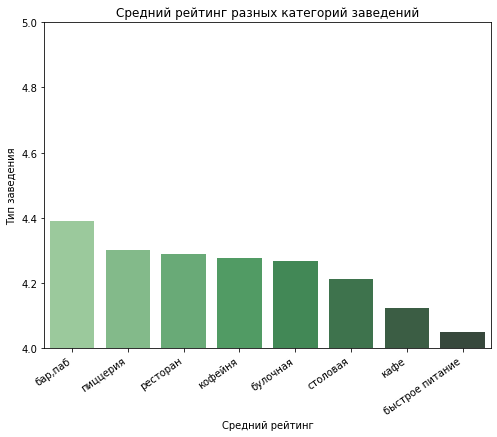

In [64]:
plt.figure(figsize=(8,6))
plt.ylim(4,5)
ax = sns.barplot(data=data.groupby('category').rating.mean().reset_index().sort_values(by='rating',ascending=False),
    y='rating', 
    x='category', 
    palette="Greens_d") 
plt.title('Средний рейтинг разных категорий заведений')
plt.xlabel('Средний рейтинг')
plt.ylabel('Тип заведения')
ax.set_xticklabels(ax.get_xticklabels(), ha='right', rotation=35);

*Средние оценки между разными категориями заведений различаются не слишком сильно. Самые высокие оценки достаются барам, ресторанам и пиццериям. У заведений типа кафе и быстрого питания отзывы явно хуже.*

Проверим, связан ли предыдущий вывод со средним чеком.

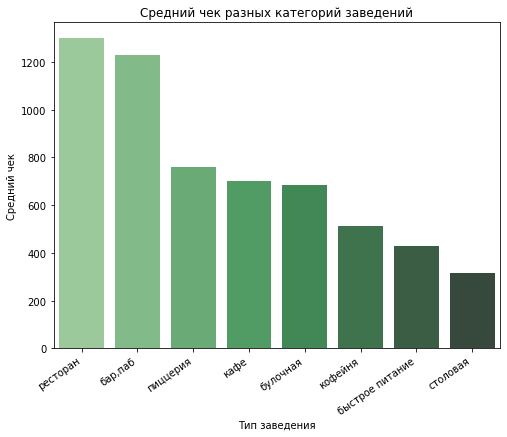

In [65]:
plt.figure(figsize=(8,6))
ax = sns.barplot(data=data.groupby('category').middle_avg_bill.mean().reset_index().sort_values(by='middle_avg_bill',ascending=False),
    y='middle_avg_bill', 
    x='category', 
    palette="Greens_d") 
plt.title('Средний чек разных категорий заведений')
plt.xlabel('Тип заведения')
plt.ylabel('Средний чек')
ax.set_xticklabels(ax.get_xticklabels(), ha='right', rotation=35);

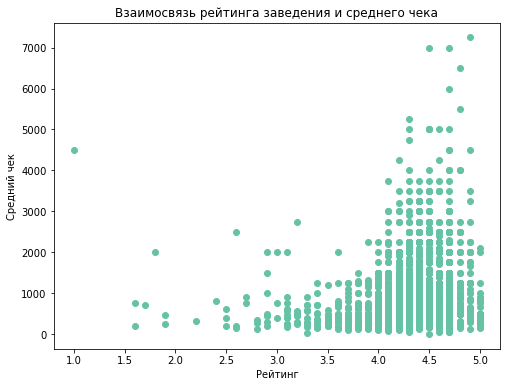

In [66]:
plt.figure(figsize=(8,6))
plt.title('Взаимосвязь рейтинга заведения и среднего чека')
plt.xlabel('Рейтинг')
plt.ylabel('Средний чек')
plt.scatter(x=data['rating'], y=data['middle_avg_bill']);

In [67]:
data['middle_avg_bill'].corr(data['rating']).round(3)

0.233

*По диграмме рассеяния визуально можно определить, что все-таки чем выше чек заведения, тем большую оценку оно получает, хотя коэффициент корреляции равен лишь 0.233. Однако нельзя сказать, что удалось обнаружить взаимосвязь между средним чеком и рейтингом заведения, если сравнивать категории заведений между собой. Однако можно выделить сегменты заведений по среднему чеку, и выяснить какая категория выгоднее, с точки зрения потенциально высоких оценок. Между столовой, быстрым питанием и кофейней преимущество имеют кофейни и столовые. Между булочными, пиццериями и кафе этими заведениями будут булочные и пиццерии.*

Определим какие административные районы Москвы представлены в датасете. Отобразим общее количество заведений и количество заведений каждой категории по районам

In [68]:
data['district_abbr'] = data.apply(
    lambda row: (''.join(re.findall(r'\b[а-яА-Я]', row["district"]))).upper(), 
    axis=1)

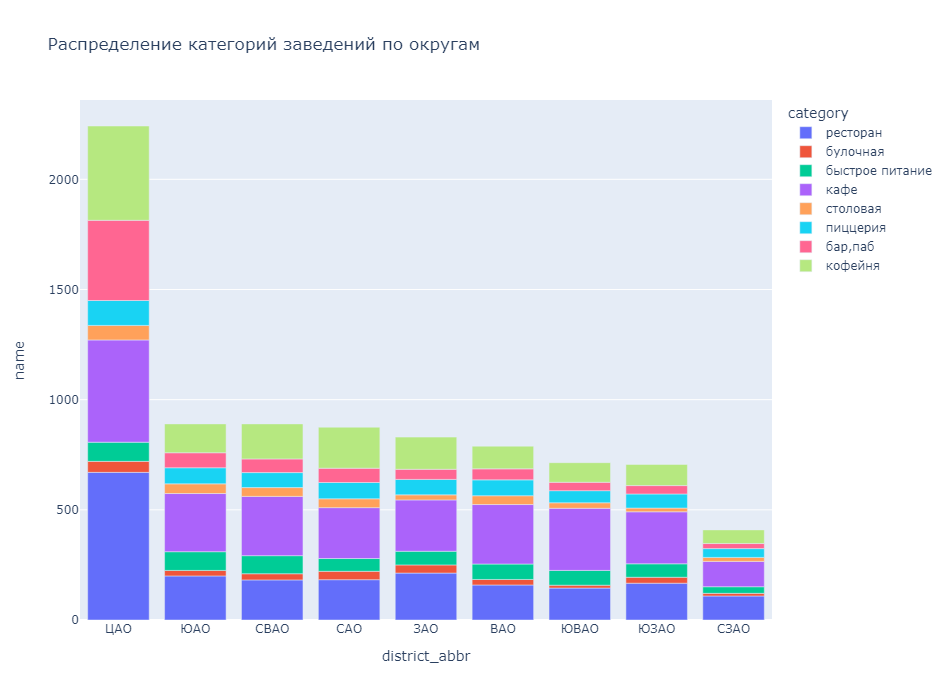

In [69]:
pop = data.groupby(['district_abbr', 'category']).agg({'name':'count'}).sort_values(by='name', ascending=False)
pop['overall'] = pop.groupby('district_abbr')["name"].transform('sum')
pop = pop.sort_values(by='overall', ascending=False)
px.bar(pop.reset_index(), 
             x="district_abbr",
             y="name",
             color="category", 
             title = "Распределение категорий заведений по округам",
             width=950, 
             height=700)

*Больше всего заведений в Центральном административном округе, меньше всего на Северо-Западе. По визуальной оценке графике, категории разных административных районах представлены в относительно равных пропорциях.*

Построим фоновую картограмму со средним рейтингом заведений каждого района.

In [70]:
with open('C:/Users/Georgii/Desktop/ANALYTICS/admin_level_geomap.geojson', encoding='utf-8') as f:
    districts = json.load(f)   

In [71]:
data_choro = data.groupby('district').rating.median()
data_choro

district
Восточный административный округ           4.3
Западный административный округ            4.3
Северный административный округ            4.3
Северо-Восточный административный округ    4.2
Северо-Западный административный округ     4.3
Центральный административный округ         4.4
Юго-Восточный административный округ       4.2
Юго-Западный административный округ        4.3
Южный административный округ               4.3
Name: rating, dtype: float64

In [72]:
moscow = folium.Map(
    location = [55.755864, 37.617698],
    zoom_start = 9.5
)
folium.GeoJson(districts).add_to(moscow)

Choropleth(geo_data = districts, data = data_choro, columns=['district', 'rating'], key_on='feature.name').add_to(moscow)

In [73]:
display(Image(filename='images/6.png', embed=True))lat = data['lat']
lng = data['lng']
name = data['name']


marker_cluster = MarkerCluster().add_to(moscow)
for lat, lng, name in zip(lat, lng, name):
    folium.CircleMarker(location=[lat, lng], 
                        radius = 9, popup=str(name), 
                        color="gray", fill_opacity = 1).add_to(marker_cluster)
# moscow

SyntaxError: invalid syntax (Temp/ipykernel_6008/3664764011.py, line 1)

In [ ]:
display(Image(filename='images/1.png', embed=True))

![](1.png)

*Можно сказать, что медианные значения рейтингов распределены достаточно равномерно по районам, за исключением повышенного рейтинга в Центральном административном округе, и заниженного рейтинга в Юго-Восточном округе.*

Найдем топ-15 улиц по количеству заведений

In [ ]:
data.street.value_counts().head(15)

Построим график распределения количества заведений и их категорий по этим улицам

In [ ]:
top_streets = data.street.value_counts().head(15).index.values.tolist()
data_top_street = data.query('street in @top_streets')

In [ ]:
pop = data_top_street.groupby(['street', 'category']).agg({'name':'count'}).sort_values(by='name',ascending=False)
pop['overall'] = pop.groupby('street')["name"].transform('sum')
pop = pop.sort_values(by='overall', ascending=False)

px.bar(pop.reset_index(), 
             x="name",
             y="street",
             color="category", 
             title = "Распределение категорий топ-15 улиц по категориям",
             width=950, 
             height=700)

*Проспект Мира - самая наполненная заведениями улица. На ней находится более 180 заведений общепита, большинство из которых кофейни, кафе и рестораны. Остались ли на ней еще места для новых заведений) По количеству пиццерий лидирует Варшавское шоссе, а барной улицей по праву может считаться Ленинградский проспект.*

Найдем улицы, на которых находится только один объект общепита.

In [ ]:
one_streets = data.groupby('street').count().query('name == 1').index.values

In [ ]:
data_one_street = data.query('street in @one_streets')

In [ ]:
data_one_street.name.count()

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.barplot(data=data_one_street.groupby('category').name.count().reset_index().sort_values(by='name',ascending=False),
    y='name', 
    x='category', 
    palette="Greens_d") 
plt.title('Распределение типов заведений на топ-15 улицах')
plt.xlabel('Тип заведения')
plt.ylabel('Кол-во')
ax.set_xticklabels(ax.get_xticklabels(), ha='right', rotation=35);

In [ ]:
moscow_one_street = folium.Map(
    location = [55.755864, 37.617698],
    zoom_start = 9.5
)
folium.GeoJson(districts).add_to(moscow_one_street)

lat = data_one_street['lat']
lng = data_one_street['lng']
name = data_one_street['name']

marker_cluster = MarkerCluster().add_to(moscow_one_street)
for lat, lng, name in zip(lat, lng, name):
    folium.CircleMarker(location=[lat, lng], 
                        radius = 9, popup=str(name), 
                        color="gray", fill_opacity = 1).add_to(marker_cluster)
# moscow_one_street

![](2.png)

In [ ]:
display(Image(filename='images/2.png', embed=True))

*Можно сказать, что таких улиц 469, большинство из которых находятся в центре города в пределах Третьего Транспортного кольца. По категориям это преимущественно кафе, кофейни и рестораны.*

Посчитаем медиану среднего чека заведения для каждого района. Будем использовать это значение в качестве ценового индикатора района. Построим фоновую картограмму с полученными значениями для каждого района и проанализируйте цены.

In [ ]:
data_bill_median = data.groupby('district').middle_avg_bill.median()
data_bill_median

In [ ]:
moscow_bill_median = folium.Map(
    location = [55.755864, 37.617698],
    zoom_start = 9.5
)
folium.GeoJson(districts).add_to(moscow_bill_median)

Choropleth(geo_data = districts, data = data_bill_median, columns=['district', 'rating'], key_on='feature.name').add_to(moscow_bill_median)
# moscow_bill_median

![](3.png)

In [ ]:
display(Image(filename='images/3.png', embed=True))

Картограмма не вполне репрезентативная. Возможно, после предобработки данных, медианные значения сместились в сторону заполенных. Попробуем посчитать среднее значение по районам

In [ ]:
data_bill_mean = data.groupby('district').middle_avg_bill.mean()
data_bill_mean

In [ ]:
moscow_bill_mean = folium.Map(
    location = [55.755864, 37.617698],
    zoom_start = 9.5
)
folium.GeoJson(districts).add_to(moscow_bill_mean)

Choropleth(geo_data = districts, data = data_bill_mean, columns=['district', 'rating'], key_on='feature.name').add_to(moscow_bill_mean)
# moscow_bill_mean

In [ ]:
display(Image(filename='images/4.png', embed=True))

*На картограмме можно наблюдать зависимость среднего чека от удаленности от центра. Чем дальше от центра, тем стоимость чека становится меньше. Не так сильно эта зависимость проглядывается в случае удаления в сторону Западного округа. Поэтому самыми "дорогими" районами можно считать Центральный и Западный административные округа.*

***Вот главные выводы, которые можно сформировать в результате проведенного исследования:***
- *В Москве преобладают заведения типа кафе, ресторан или кофейня. Наименее часто люди в Москве посещают булочные и столовые*
- *Доля сетевых заведений в Москве равняется 38,1 %, а самое большая доля сетевых заведений среди категорий общепита у кофеен*
- *Большую часть сетевых заведений в топ-15 по популярности в Москве занимают кофейни.*
- *У самых популярных сетевых заведений оценки посетителей соответсвенно выше, чем у всех заведений вместе. Однако самые высокие оценки чаще получают заведения не из топ-15*
- *Удалось обнаружить взаимосвязь между средним рейтингом и средним чеком заведения, однако, не для всех категорий заведений эта корреляция существенна*
- *Больше всего заведений находится в Центральном округе. Меньше всего - на Северо-Западе*
- *Наиболее высокий рейтинг у заведений, которые находятся в центре Москвы*
- *Проспект Мира - самая наполненная заведениями улица. На ней находится более 180 заведений общепита, большинство из которых кофейни, кафе и рестораны. По количеству пиццерий лидирует Варшавское шоссе, а барной улицей по праву может считаться Ленинградский проспект.*
- *Удалось обнаружить взаимосвязь между средним рейтингом и удаленностью заведения от центра. Чем дальше от центра, тем рейтинг становится меньше.*
- *Самые "дорогими" районами можно считать Центральный и Западный административные округа.*

# Детализация исследования

Рассмотрим возможность открытия в Москве кофейни в стиле кофейни «Central Perk» из сериала «Друзья». Для этого нужно ответить на ряд вопросов:
- Сколько всего кофеен в датасете? В каких районах их больше всего, каковы особенности их расположения?
- Есть ли круглосуточные кофейни?
- Какие у кофеен рейтинги? Как они распределяются по районам?
- На какую стоимость чашки капучино стоит ориентироваться при открытии и почему?

Посмотрим на количество кофеен в датасете, их распределение по категориям и особенности расположения

In [ ]:
data_coffee = data[data['category'] == 'кофейня']

In [ ]:
print (f'В датасете всего {data_coffee.name.count()} кофеен')

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.barplot(data=data_coffee.groupby('district_abbr').name.count().reset_index().sort_values(by='name',ascending=False),
    y='name', 
    x='district_abbr', 
    palette="Greens_d") 
plt.title('Распределение кофеен по округам')
plt.xlabel('Округ')
plt.ylabel('Кол-во')
ax.set_xticklabels(ax.get_xticklabels(), ha='right');

In [ ]:
moscow_coffee= folium.Map(
    location = [55.755864, 37.617698],
    zoom_start = 9.5
)
folium.GeoJson(districts).add_to(moscow_coffee)

lat = data_coffee['lat']
lng = data_coffee['lng']
name = data_coffee['name']

marker_cluster = MarkerCluster().add_to(moscow_coffee)
for lat, lng, name in zip(lat, lng, name):
    folium.CircleMarker(location=[lat, lng], 
                        radius = 9, popup=str(name), 
                        color="gray", fill_opacity = 1).add_to(marker_cluster)
# moscow_coffee

In [ ]:
display(Image(filename='images/5.png', embed=True))

*Больше всего кофеен можно встретить в центре, на севере, на западе и на юго-западе города. Эти направления можно выделить, как наиболее релевантные. Однако, я бы с осторожностью рассматривал идею открытия кофейни в Центральном округе. Это сопровождается большими финансовыми вложениями, большими рисками. К тому же формат планируемой кофейни предполагает более спокойную и камерную обстановку. В то время, как в центре, большим приоритетом пользуются заведения типа кофе-ту-гоу, за счет более высокого темпа деловой жизни. Однако, слишком далеко от центра, место расположения тоже рассматривать не стоит. Все-таки большинство людей, предпочитают проводить свой досуг ближе к центру города.*

Оценим количество круглосуточных кофеен, и их долю среди сетевых кофеен

In [ ]:
print (f'В датасете всего {data_coffee[data_coffee["is_24/7"] == True].name.count()} круглосуточных кофеен')

In [ ]:
data_coffee[data_coffee["is_24/7"] == True].name.value_counts()

In [ ]:
chain_coffee_percent = (data_coffee[data_coffee["is_24/7"] == True].chain.sum() \
        / data_coffee[data_coffee["is_24/7"] == True].chain.count()).round(2)
print (f'Из круглосуточных кофеен процент сетевых составляет {int(chain_coffee_percent*100)} %')

In [ ]:
labels_krug = ['круглосуточные', 'некруглосуточные']
values_krug = [data_coffee[data_coffee["is_24/7"] == True].name.count(), 
               data_coffee[data_coffee["is_24/7"] == False].name.count()]
fig = go.Figure(data=[go.Pie(labels=labels_krug, values=values_krug)])
fig.update_layout(
    title=go.layout.Title(
        text="Соотношение круглосуточных и некруглосуточных кофеен",xref="paper",x=0)
)
fig.show() 

*Так как на данном этапе проекта кофейня не предполагает сетевую направленность, исходя, их полученных выше графиков и расчетов, не рекомендуется открывать круглосуточную кофейню.*

Проверим рейтинги кофеен. Как мы помним, по среднему рейтингу кофейни уступают ресторанам и пабам, но выигрывают у кафе и столовых. Посмотрим как рейтинги распределяются по районам.

In [ ]:
data_coffee_rating = data_coffee.groupby('district')['rating'].mean()

In [ ]:
moscow_coffee_rating = folium.Map(
    location = [55.755864, 37.617698],
    zoom_start = 9.5
)
folium.GeoJson(districts).add_to(moscow_coffee_rating)

Choropleth(geo_data = districts, data = data_coffee_rating, columns=['district', 'rating'], key_on='feature.name').add_to(moscow_coffee_rating)
# moscow_coffee_rating

In [ ]:
display(Image(filename='images/6.png', embed=True))

*Лидирующие по рейтингу району схожи с районами с большим количеством кофеен. Самые качественные кофейни по мнению посетителей находятся в Центральном, Северном, Северо-Западном и Юго-Западном округах. Если не брать в расчет центр Москвы, где присутствует слишком большой трафик, можно выделить два округа, в которых присутствует достаточная плотность заведений типа кофеен, а также высокий рейтинг среди них. Это Северный и Юго-Западный округа. Часто, первое заведение рекомендуют открывать рядом с успешными конкурентами, так можно не ошибиться с потокок посетителей, а в будущем возможно переманить какое-то количество людей.  
Можно также взять на себя некоторые риски и попробовать открыть заведение в районе ЗАО, где достаточная плотность заведений, но низкие рейтинги. Поработать над качеством заведения и выделиться за счет этого среди конкурентов.*

Выведем медианные значения стоимости чашки кофе для разных ценовых категорий кофеен и определим, на какую среднюю стоимость чашки кофе нужно ориентироваться инвесторам.

In [ ]:
data_coffee.groupby('price').middle_coffee_cup.median()

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.barplot(data=data_coffee.groupby('price').name.count().reset_index().sort_values(by='name',ascending=False),
    y='name', 
    x='price', 
    palette="Greens_d") 
plt.title('Распределение кофеен по ценовым сегментам')
plt.xlabel('Ценовой сегмент')
plt.ylabel('Кол-во')
ax.set_xticklabels(ax.get_xticklabels(), ha='center');

*При открытии кофейни такого тематического формата, стоит смотреть в сторону сегмента выше среднего. Заказчики хотят, чтобы атмосфера заведения была такая же, как в сериале. А значит, предполагается, что люди будут приходить в заведение, по большей части, чтобы комфортно провести продолжительное время друг с другом. Для этого потребуется необходимое количество посадочных мест, интерьер и т.д. Поэтому ценовой сегмент рекомендуется рассматривать выше среднего, или, хотя бы, в верхней границе среднего значения. Средняя стоимость чашки кофе в таком случае будет в районе 205 рублей, что всего на 5 рублей больше медианного значения в среднем сегменте.*

***Общие рекомендации по открытию кофейни типа "Central Perks":***
- *Наиболее релевантными, для открытия кофейни, являются Северный и Юго-Западный округа. В этих районах кофейни пользуются популярностью и получают хорошие оценки от посетителей*
- *Стоит с предосторожностью рассматривать Центральный административный округ для открытия заведения. Возможно быстрый темп деловой жизни в центре не будет сочетаться с форматом планируемой кофейни*
- *Не стоит делать кофейню круглосуточной, в основном, такой режим работы соответствует сетевым заведениям*
- *Ориентироваться необходимо на сегмент выше среднего. В таком случае, средняя цена за чашку кофе будет в районе 205 рублей.*

# Выводы

**По итогам результатам работы были проделаны следующие шаги по проекту:**
- ***Обработан файл с даннымы о заведениях общественного питания Москвы за лето 2022 года.***
- ***Подготовлены исследование рынка Москвы*** 
- ***Отмечены важные тезисы и наблюдения***
- ***Проведен краткий анализ возможности открытия в Москве кофейни в стиле «Central Perk» из сериала «Друзья»***

**По итогам проделанной работы удалось установить следующее:**
- ***В Москве преобладают заведения типа кафе, ресторан или кофейня. Наименее часто люди в Москве посещают булочные и столовые.***
- ***Наиболее высокий рейтинг у заведений, которые находятся в центре Москвы***
- ***Существует взаимосвязь между средним рейтингом и удаленностью заведения от центра. Чем дальше от центра, тем рейтинг становится меньше.***
- ***Обнаружена также взаимосвязь между средним рейтингом и средним чеком заведения, однако не для всех категорий заведений эта корреляция существенна***
- ***Доля сетевых заведений в Москве равняется 38,1 %, а самое большая доля сетевых заведений среди категорий общепита у кофеен***
- ***У самых популярных сетевых заведений оценки посетителей соответственно выше, чем у всех вместе. Однако самые высокие оценки чаще получают заведения не из топ-15***


**Исходя из желания инвесторов открыть тематическую кофейню по типу "Central Perks", был проведен анализ и предложены следующие рекомендации по открытию заведения:**
- ***Наиболее релевантными, для открытия кофейни, являются Северный и Юго-Западный округа. В этих районах кофейни пользуются популярностью и получают хорошие оценки от посетителей***
- ***Стоит с предосторожностью рассматривать Центральный административный округ для открытия заведения. Возможно быстрый темп деловой жизни в центре не будет сочетаться с форматом планируемой кофейни***
- ***Не стоит делать кофейню круглосуточной, в основном, такой режим работы соответствует сетевым заведениям***
- ***Ориентироваться необходимо на сегмент выше среднего. В таком случае, средняя цена за чашку кофе будет в районе 205 рублей.***

<br>

Презентация: https://docs.google.com/presentation/d/1qiAuG2PG7s1D4429SOD9wvosGUrnDHsZw1sbpjDRPKo/edit?usp=sharing